# Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. 

*The company wants to know:*

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands
- Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

### Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

In [171]:
# Importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

In [172]:
#Read the csv file using pandas

boom_bikes = pd.read_csv('day.csv')

In [173]:
boom_bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2/1/2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,3/1/2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,4/1/2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,5/1/2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [174]:
# looking at the shape , describe and info of the bikes dataset

boom_bikes.shape

(730, 16)

In [175]:
boom_bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [176]:
boom_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 88.5+ KB


In [177]:
#check the datatypes of data

boom_bikes.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [178]:
#check the axes of data

boom_bikes.axes


[RangeIndex(start=0, stop=730, step=1),
 Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
        'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
        'casual', 'registered', 'cnt'],
       dtype='object')]

In [179]:
# Handling missing values

boom_bikes.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

- There is no missing values in the given boombike data

 ### Exploratory Data Analysis 

In [180]:
### Handle Outliers

boom_bikes.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [181]:
# Droping instant column as it is index column which has nothing to do with target

boom_bikes.drop(['instant'], axis = 1, inplace = True)

# Dropping dteday as we have already have month and weekday columns to work with

boom_bikes.drop(['dteday'], axis = 1, inplace = True)

# Dropping casual and registered columnsa as as we have cnt column which is sum of the both that is the target column

boom_bikes.drop(['casual'], axis = 1, inplace = True)
boom_bikes.drop(['registered'], axis = 1, inplace = True)

boom_bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


#### We have the following types of columns:
- **Categorical columns** : season , month , weathersit , weekday
- **Continuous/Numerical columns** : windspeed , hum , temp , atemp , count
- **Binary/Dichotomous columns**: yr , holiday , workingday

In [182]:
# unique values in all columns

boom_bikes.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

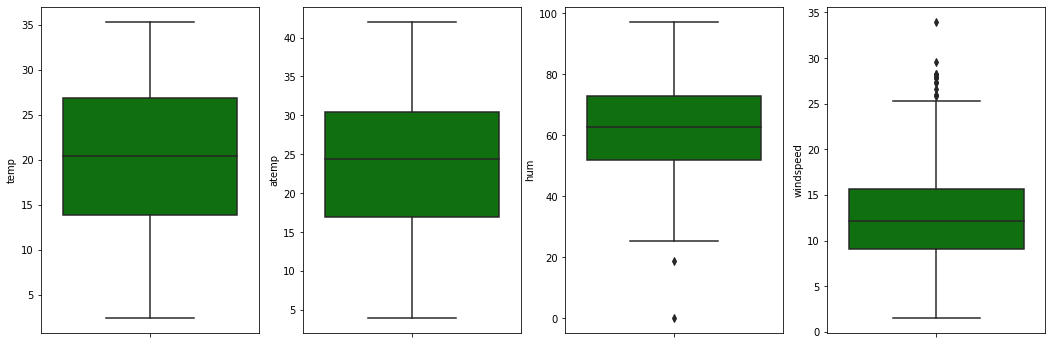

In [183]:
# box plots for indepent variables with continuous values

cols = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(18,6))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=boom_bikes, color= 'green')
    i+=1

- There are very few outliers on Humidity and windspeed , we can go with them as they have their own importance.

In [184]:
# Convert season and weathersit to categorical types

boom_bikes.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

boom_bikes.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)

boom_bikes.mnth = boom_bikes.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

boom_bikes.weekday = boom_bikes.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})
boom_bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,good,9.305237,11.46350,43.6957,12.522300,1600


In [185]:
# Changing the name to avoid errors in further steps

boom_bikes.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

boom_bikes.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)

boom_bikes.mnth = boom_bikes.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

boom_bikes.weekday = boom_bikes.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})

boom_bikes.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,good,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,jan,0,sat,0,good,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,jan,0,sun,0,moderate,8.057402,10.44195,49.8696,11.304642,1510
7,spring,0,jan,0,mon,1,moderate,6.765000,8.11270,53.5833,17.875868,959
8,spring,0,jan,0,tue,1,good,5.671653,5.80875,43.4167,24.250650,822
9,spring,0,jan,0,wed,1,good,6.184153,7.54440,48.2917,14.958889,1321


<Figure size 1440x2160 with 0 Axes>

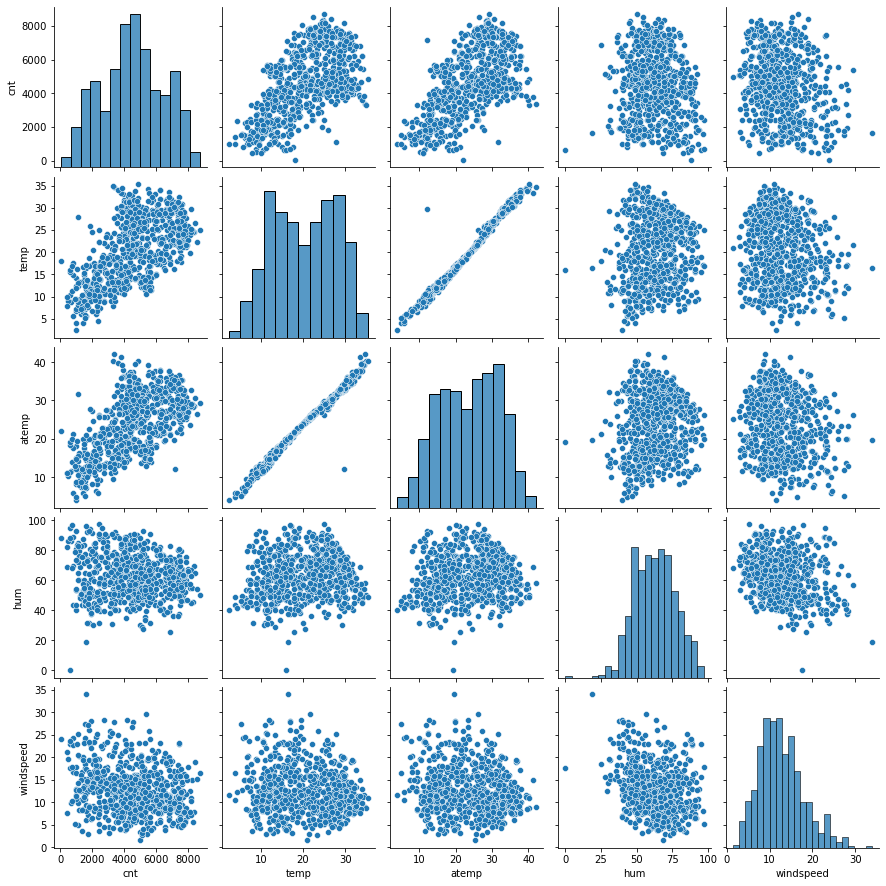

In [186]:
# Pairplots for continuous numeric variables

plt.figure(figsize = (20,30))
sns.pairplot(data=boom_bikes,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

### Oberservation : 
- Looks like the temp and atemp has the highest corelation with the target variable cnt
- temp and atemp are highly co-related with each other

#### As per the correlation map, output variable has a linear relationship with variables - temp, atemp. 

### Visualising the Data to Find the Correlation between the Numerical Variable

<AxesSubplot:>

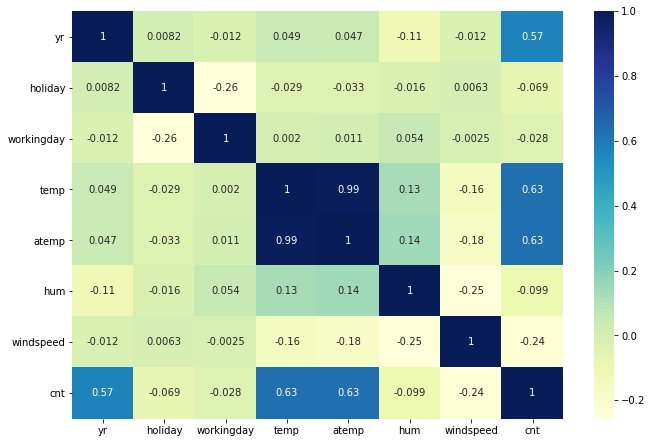

In [187]:
plt.figure(figsize=(11,7.5))
sns.heatmap(boom_bikes.corr(),annot=True,cmap='YlGnBu')

- **Here we see that temp and atemp has correlation morHere we see that temp and atemp has correlation more than .99 means almost 1 (highly correlated) and atemp seems to be derived from temp so atemp field can be dropped here only.**


- **From the correlation map, temp, atemp and days_old seems to be highly correlated and only should variable can be considered for the model. However let us elminate it based on the Variance Inflation Factor later during the model building.**

### Analysing Categorical Variabels with target variables

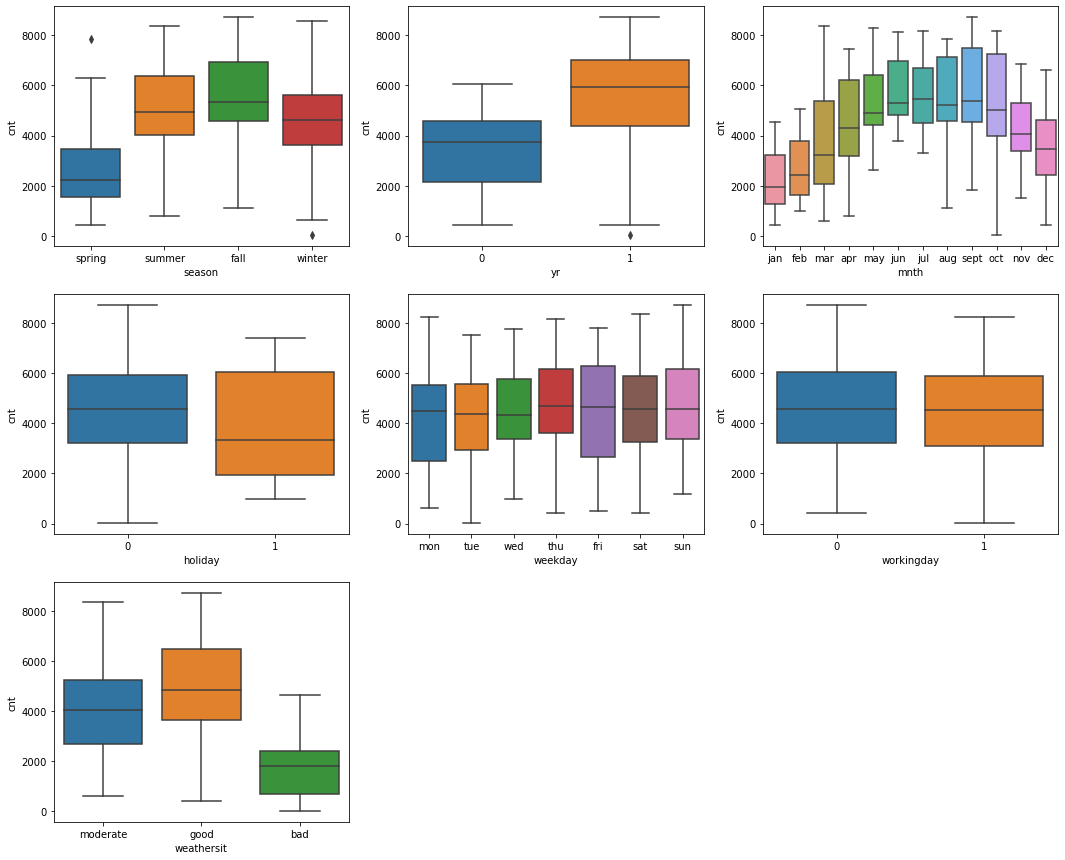

In [188]:
# Boxplot for categorical variables to see demands

vars_cat = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(18, 15))
for i in enumerate(vars_cat):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=boom_bikes, x=i[1], y='cnt')
plt.show()

### Observation :

- Season - "fall" has highest demand for rental bikes.
- Next year demand has been grown.
- Demand is continuously growing each month till June. September month has highest demand. After September, demand is        decreasing.
- When there is a holiday, demand has decreased.
- The good weathershit has highest demand.

### Count Vs Temprature

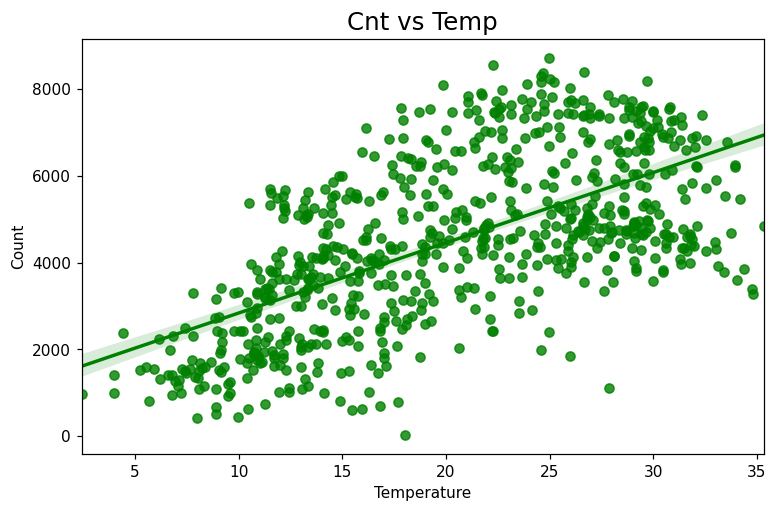

In [189]:
plt.figure(figsize=(8,5),dpi=110)
plt.title("Cnt vs Temp",fontsize=16)
sns.regplot(data=boom_bikes,y="cnt",x="temp" , color = 'green')
plt.xlabel("Temperature")
plt.ylabel("Count")
plt.show()

### Observation 

- Demand for bikes is positively correlated to temp
- We can see that cnt is linearly increasing with temp indicating linear relation.

### Count Vs Humidity 

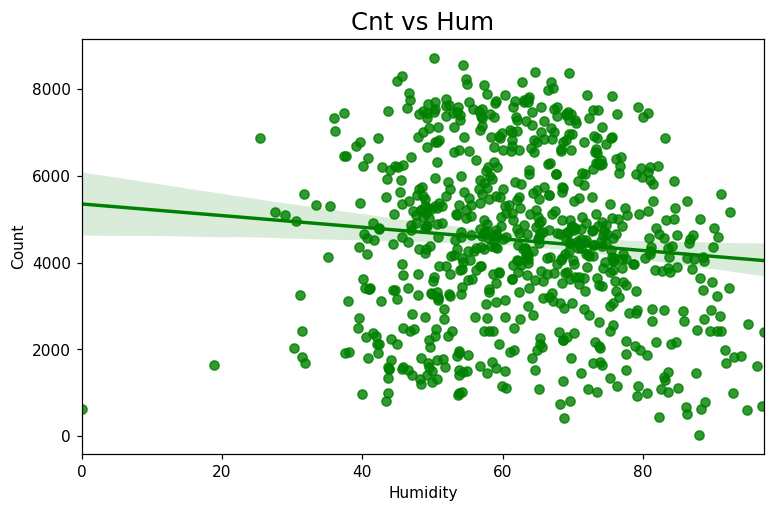

In [190]:
plt.figure(figsize=(8,5),dpi=110)
plt.title("Cnt vs Hum",fontsize=16)
sns.regplot(data=boom_bikes,y="cnt",x="hum" , color = 'green')
plt.xlabel("Humidity")
plt.ylabel("Count")
plt.show()

### Observation :

- Humudity is more scattered around.
- Although cnt decreasing with increase in humidity

### Count Vs Windspeed

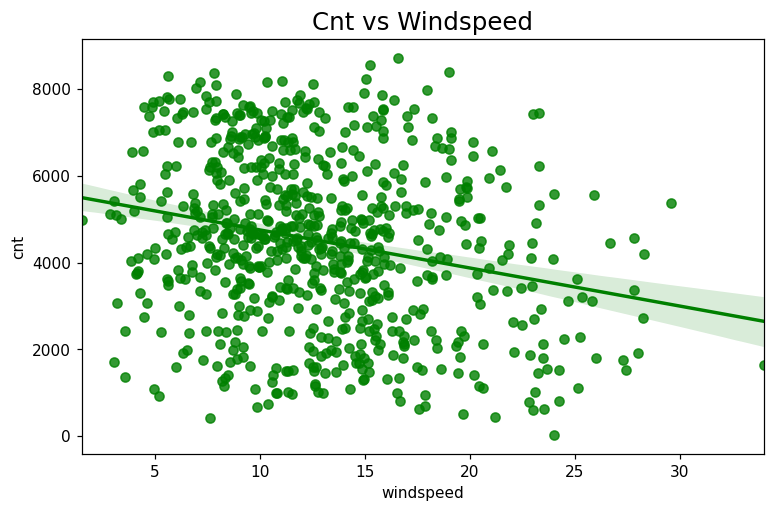

In [191]:
plt.figure(figsize=(8,5),dpi=110)
plt.title("Cnt vs Windspeed",fontsize=16)
sns.regplot(data=boom_bikes,y="cnt",x="windspeed" , color = 'green')
plt.show()

#### Observation :
- Windspeed are more scattered around.
- cnt decreasing with increase in windspeed.

In [192]:
boom_bikes.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.690411,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.500343,0.167266,0.462641,7.506729,8.150308,14.237589,5.195841,1936.011647
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


 ## Data Preparation for Linear Regression

#### Create dummy variables for all categorical variables

In [193]:
boom_bikes = pd.get_dummies(data=boom_bikes,columns=["season","mnth","weekday"],drop_first=True)
boom_bikes = pd.get_dummies(data=boom_bikes,columns=["weathersit"])

- Dropping the first columns as (p-1) dummies can explain p categories.
- In weathersit first column was not dropped so as to not lose the info about severe weather situation.

In [194]:
# Columns after creating dummies

boom_bikes.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [195]:
boom_bikes.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,1,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,1,0


## Model Building

### Split Data into training and test

In [196]:
boom_bikes.shape

(730, 31)

In [197]:
# y contains only target variable and X is all remainign variable also our independent variables

from sklearn.model_selection import train_test_split

#Train Test split with 70:30 ratio

bikes_train, bikes_test = train_test_split(boom_bikes, train_size = 0.7, test_size = 0.3, random_state = 100)

In [198]:
# Checkinf shape of the train dataset.
bikes_train.shape

(510, 31)

In [199]:
# Checking shape of the test dataset.
bikes_test.shape

(219, 31)

### Scaling the Features

In [200]:
# Importing required library

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [201]:
# Scaling on the continuous columns : 'windspeed' , 'temp' , 'humidity' , 'count'

vars = ['temp','atemp','hum','windspeed']

bikes_train[vars] = scaler.fit_transform(bikes_train[vars])

bikes_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
653,1,0,1,0.509887,0.501133,0.575354,0.300794,7534,0,0,...,0,0,0,0,0,0,1,0,1,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,7216,0,0,...,0,0,0,0,0,0,1,0,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,4066,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,1796,1,0,...,0,1,0,0,0,0,0,0,1,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,4220,0,1,...,0,0,0,1,0,0,0,0,0,1


In [202]:
bikes_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.512989,0.650369,0.320768,4486.382353,0.243137,0.245098,...,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.627451,0.343137
std,0.500429,0.157763,0.453386,0.225844,0.212385,0.145882,0.169797,1952.158739,0.429398,0.430568,...,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.483958,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,3120.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,4530.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,5973.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [203]:
bikes_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
653,1,0,1,0.509887,0.501133,0.575354,0.300794,7534,0,0,...,0,0,0,0,0,0,1,0,1,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,7216,0,0,...,0,0,0,0,0,0,1,0,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,4066,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,1796,1,0,...,0,1,0,0,0,0,0,0,1,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,4220,0,1,...,0,0,0,1,0,0,0,0,0,1


## Data Modelling and Evaluation

### Build a Model using RFE and Automated approach

In [204]:
# Importing RFE and LinearRegression

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

#### Dividing into X and Y sets for the model building :

In [205]:
y_train = bikes_train.pop('cnt')
X_train = bikes_train

In [206]:
# Running RFE with selecting 15 variables 

lm = LinearRegression()
lm.fit(X_train, y_train)

np.random.seed(0)

# running RFE,15 is the number of variables we want RFE to select
rfe = RFE(lm, 15)             
rfe = rfe.fit(X_train, y_train)


In [207]:
#Columns selected by RFE and their weights

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', False, 7),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_aug', False, 12),
 ('mnth_dec', False, 2),
 ('mnth_feb', False, 3),
 ('mnth_jan', True, 1),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 15),
 ('mnth_mar', False, 16),
 ('mnth_may', False, 10),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 13),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 9),
 ('weekday_sat', False, 5),
 ('weekday_sun', False, 6),
 ('weekday_thu', False, 14),
 ('weekday_tue', False, 8),
 ('weekday_wed', False, 11),
 ('weathersit_bad', True, 1),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', True, 1)]

In [208]:
#Columns selected by RFE and their weights

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', False, 7),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_aug', False, 12),
 ('mnth_dec', False, 2),
 ('mnth_feb', False, 3),
 ('mnth_jan', True, 1),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 15),
 ('mnth_mar', False, 16),
 ('mnth_may', False, 10),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 13),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 9),
 ('weekday_sat', False, 5),
 ('weekday_sun', False, 6),
 ('weekday_thu', False, 14),
 ('weekday_tue', False, 8),
 ('weekday_wed', False, 11),
 ('weathersit_bad', True, 1),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', True, 1)]

## Manual elimination

#### #Function to build a model using statsmodel api - Takes the columns to be selected for model as a parameter

In [209]:
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

#### Function to calculate VIFs -Takes the columns for which VIF to be calcualted as a parameter

In [210]:
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [211]:
#Print Columns selected by RFE. We will start with these columns for manual elimination

X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_nov',
       'mnth_sept', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [212]:
# Features not selected by RFE

X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jun',
       'mnth_mar', 'mnth_may', 'mnth_oct', 'weekday_mon', 'weekday_sat',
       'weekday_sun', 'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

#### Taking 15 columns supported by RFE for regression

In [213]:
X_train_rfe = X_train[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']]

In [214]:
# checking shape again

X_train_rfe.shape

(510, 15)

## Model Building

### Start with all variables selected by RFE

In [215]:
cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.3
Date:                Tue, 10 May 2022   Prob (F-statistic):          9.28e-189
Time:                        18:06:59   Log-Likelihood:                -4112.1
No. Observations:                 510   AIC:                             8256.
Df Residuals:                     494   BIC:                             8324.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2725.7022    

### Correlation of features selected by RFE with target column and also to check impact of different features on target

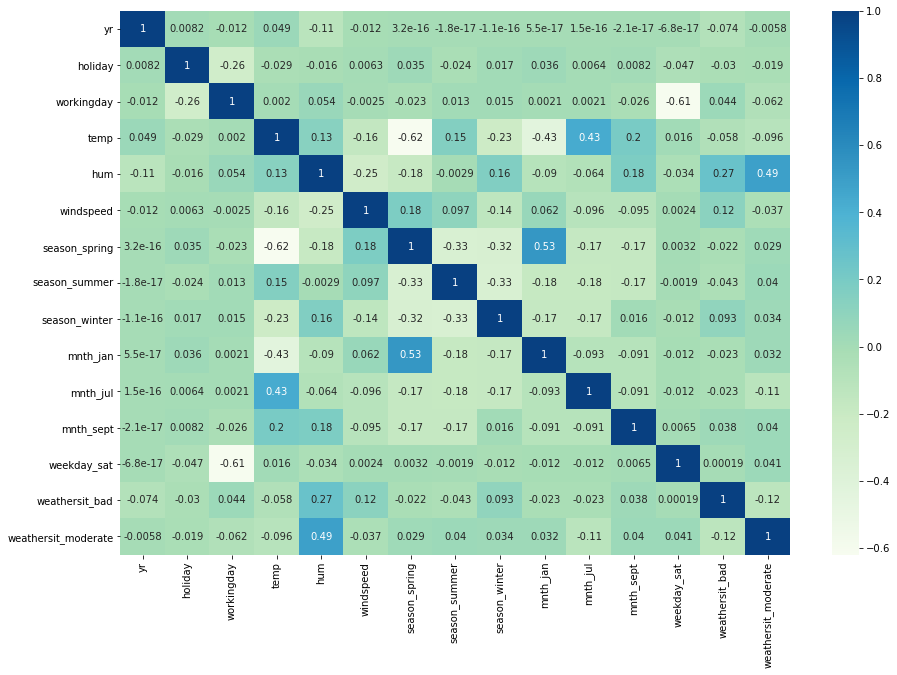

In [216]:
plt.figure(figsize = (15,10))
sns.heatmap(boom_bikes[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']].corr(), cmap='GnBu', annot=True)
plt.show()

### Dropping the variable mnth_jan which has negative coefficient and it is insignificant due to high p-value

In [217]:
cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.9
Date:                Tue, 10 May 2022   Prob (F-statistic):          3.73e-189
Time:                        18:07:13   Log-Likelihood:                -4113.9
No. Observations:                 510   AIC:                             8258.
Df Residuals:                     495   BIC:                             8321.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2628.4231    

### All the columns have p-value > .05 so checking VIFs
### Dropping the variable hum which has negative coefficient and it is insignificant due to high p-value

In [218]:
cols = ['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     197.0
Date:                Tue, 10 May 2022   Prob (F-statistic):          2.94e-186
Time:                        18:07:14   Log-Likelihood:                -4123.6
No. Observations:                 510   AIC:                             8275.
Df Residuals:                     496   BIC:                             8334.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1939.2498    

### Dropping the variable holiday which has negative coefficient and it is insignificant due to has high p-value

In [219]:
cols = ['yr', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     204.8
Date:                Tue, 10 May 2022   Prob (F-statistic):          1.45e-183
Time:                        18:07:14   Log-Likelihood:                -4132.8
No. Observations:                 510   AIC:                             8292.
Df Residuals:                     497   BIC:                             8347.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1788.7153    

### Dropping mnth_jul because of same reasons

In [220]:
cols = ['yr', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     219.9
Date:                Tue, 10 May 2022   Prob (F-statistic):          3.66e-183
Time:                        18:07:15   Log-Likelihood:                -4136.5
No. Observations:                 510   AIC:                             8297.
Df Residuals:                     498   BIC:                             8348.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1710.3258    

### Dropping the variable temp as well due to same reasons

In [221]:
cols = ['yr', 'workingday', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     157.5
Date:                Tue, 10 May 2022   Prob (F-statistic):          2.33e-147
Time:                        18:07:16   Log-Likelihood:                -4224.0
No. Observations:                 510   AIC:                             8470.
Df Residuals:                     499   BIC:                             8516.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                5078.7474    

### Trying to replace July with spring as both are highly correlated


In [222]:
cols = ['yr', 'workingday', 'windspeed', 'mnth_jul',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     76.67
Date:                Tue, 10 May 2022   Prob (F-statistic):           3.18e-94
Time:                        18:07:17   Log-Likelihood:                -4349.9
No. Observations:                 510   AIC:                             8722.
Df Residuals:                     499   BIC:                             8768.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3665.6686    

### Trying to replace July with spring as both are highly correlated

In [223]:
cols = ['yr', 'workingday', 'windspeed', 'mnth_jul',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     76.67
Date:                Tue, 10 May 2022   Prob (F-statistic):           3.18e-94
Time:                        18:07:17   Log-Likelihood:                -4349.9
No. Observations:                 510   AIC:                             8722.
Df Residuals:                     499   BIC:                             8768.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3665.6686    

### Removing windspeed with spring as windspeed are highly correlated with temp

In [224]:
cols = ['yr', 'workingday', 'season_spring', 'mnth_jul',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     145.0
Date:                Tue, 10 May 2022   Prob (F-statistic):          1.14e-140
Time:                        18:07:18   Log-Likelihood:                -4239.8
No. Observations:                 510   AIC:                             8502.
Df Residuals:                     499   BIC:                             8548.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4696.8396    

### Using weekend "Sunday" which was dropped during RFE instead of Saturday.

In [225]:
cols = ['yr', 'workingday', 'season_spring', 'mnth_jul',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     144.9
Date:                Tue, 10 May 2022   Prob (F-statistic):          1.31e-140
Time:                        18:07:19   Log-Likelihood:                -4239.9
No. Observations:                 510   AIC:                             8502.
Df Residuals:                     499   BIC:                             8548.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4711.5359    

### Adding temp and removed 'season_summer' and 'workingday'

In [226]:
cols = ['yr', 'season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate', 'temp']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     250.6
Date:                Tue, 10 May 2022   Prob (F-statistic):          5.27e-179
Time:                        18:07:19   Log-Likelihood:                -4152.0
No. Observations:                 510   AIC:                             8324.
Df Residuals:                     500   BIC:                             8366.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1663.9669    

### Observations :

- Here VIF seems to be almost accepted. p-value for all the features is  almost 0.0 and R2 is 0.821 
- -Difference between R-squared and Adjusted R-squared values for this model is veryless, which also means that there are no additional parameters that can be removed from this model.
- Let us select Model where we adding temp and removed 'season_summer' and 'workingday' as our final as it has all important statistics high (R-square, Adjusted R-squared and F-statistic), along with no insignificant variables and no multi coliinear (high VIF) variables. 


### Building a model with all columns to select features automatically


In [227]:
def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

In [228]:
cols = ['yr', 'season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate', 'temp']

lr = build_model_sk(X_train[cols],y_train)
print(lr.intercept_,lr.coef_)

1663.9668540967077 [ 2026.94257566  -987.90783362  -600.05246372   463.58371557
   536.79627157   180.56762145 -2565.43024058  -685.84482685
  4107.01269495]


## Model Evaluation

### Residucal Analysis

In [229]:
y_train_pred = lr.predict(X_train[cols])

In [230]:
#Plot a histogram of the error terms
def plot_res_dist(act, pred):
    sns.distplot((act-pred), bins =20 , color= 'green')
    plt.title('Error Terms' , fontsize = 18)
    plt.xlabel('Errors' , fontsize = 18)

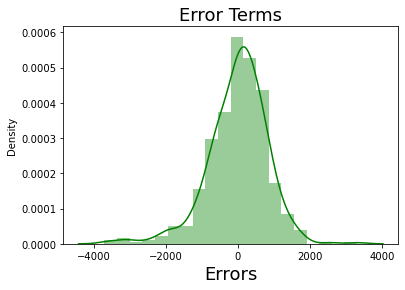

In [231]:
plot_res_dist(y_train, y_train_pred)

- Errors are normally distribured here with mean 0



### Actual vs Predicted

Text(0, 0.5, 'y_train_pred')

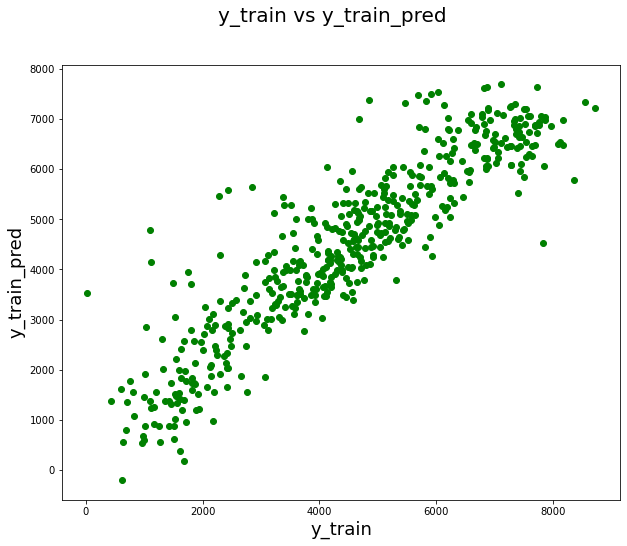

In [232]:
# Plotting y_test and y_train_pred to understand the spread.

fig = plt.figure(figsize=(10,8))
plt.scatter(y_train,y_train_pred , color ='green')
fig.suptitle('y_train vs y_train_pred', fontsize=20)             
plt.xlabel('y_train', fontsize=18)                          
plt.ylabel('y_train_pred', fontsize=18) 

### Error Terms

Text(0, 0.5, 'y_train-y_train_pred')

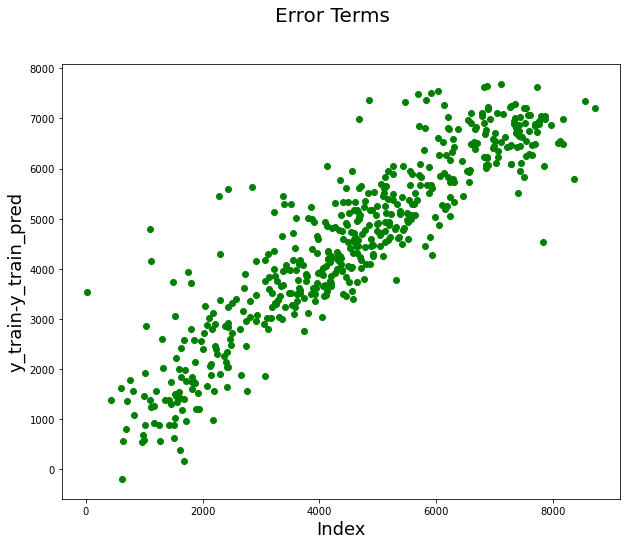

In [233]:
fig = plt.figure(figsize=(10,8))
plt.scatter(y_train,y_train_pred , color ='green')
fig.suptitle('Error Terms', fontsize=20)             
plt.xlabel('Index', fontsize=18)                          
plt.ylabel('y_train-y_train_pred', fontsize=18) 


In [234]:
### R-squared Value

r2_score(y_train,y_train_pred)

0.8185588096982062

### Observations :
- R2 Same as we obtained for our final mode

### Calculating the  Mean Absolute error , Mean Squared Error and Root Mean Squared Error

In [235]:
from sklearn import metrics

print('Mean Absolute error:', metrics.mean_absolute_error(y_train, y_train_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_train_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))

Mean Absolute error: 612.8093505224131
Mean Squared Error: 690102.7387549687
Root Mean Squared Error: 830.72422545329


####  Difference between the R-squared value and adj R-squared value respectively for the train and test dataset is not more than 5% , therefore we can say that this is a good model. 

### Final model of manual + rfe approach using statsmodel to interpret it


In [236]:
import statsmodels.api as sm 

col = X_train.columns[rfe.support_]
col
X_train_rfe = X_train[col]
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   

X_train_new = X_train_rfe.drop(["const"], axis = 1)

X_train_lm = sm.add_constant(X_train_new)

#Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()

##Looking at the summary of our linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     191.4
Date:                Tue, 10 May 2022   Prob (F-statistic):          2.25e-189
Time:                        18:07:29   Log-Likelihood:                -4113.4
No. Observations:                 510   AIC:                             8257.
Df Residuals:                     495   BIC:                             8320.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1348.7374    252.650      5.338      0.000     852.339    1845.135
yr                   2000.2017     70.465     28.386      0.000    1861.755    2138.648
holiday              -801.3905    223.131     -3.592      0.000   -1239.790    -362.991
temp                 4391.4648    305.620     14.369      0.000    3790.992    4991.938
hum                 -1462.0059    328.025     -4.457      0.000   -2106.500    -817.512
windspeed           -1611.3936    224.475     -7.179      0.000   -2052.434   -1170.353
season_spring        -490.0769    183.953     -2.664      0.008    -851.502    -128.652
season_summer         405.3432    131.586      3.080      0.002     146.808     663.878
season_winter         857.1414    155.318      5.519      0.000     551.977    1162.306
mnth_jan             -294.8787    152.847     -1.929      0.054    -595.188       5.431
mnth_jul             -488.6635    158.875     -3.076      0.002    -800.816    -176.511
mnth_nov             -219.8006    150.219     -1.463      0.144    -514.947      75.345
mnth_sept             693.4953    145.834      4.755      0.000     406.966     980.025
weathersit_bad       -793.9951    192.338     -4.128      0.000   -1171.896    -416.095
weathersit_good      1307.3728     91.486     14.290      0.000    1127.623    1487.122
weathersit_moderate   835.3597    108.672      7.687      0.000     621.845    1048.874
==============================================================================
Omnibus:                       60.875   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              140.686
Skew:                          -0.640   Prob(JB):                     2.82e-31
Kurtosis:                       5.233   Cond. No.                     2.18e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.03e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Obsevation of significant variables to predict the demand for shared bikes :
- temp = 0.4693
- windspeed = -0.1482 
- year_2019 = 0.2335
- month_Jul = -0.0845
- season_spring = -0.1122
- season_winter = 0.0464
- weather_light rain or snow = -0.2810 
- weather_mist and cloudy = -0.0794
- holiday = -0.0926

## Conclusion :

### The out come of the model building , the comapany should focus on the following features:
- Should focus on expanding business during Spring (Season-wise) and September (Month-wise), new offers can be given during spring when the weather is pleasant.
- Compared to 2019 data, it is expected to have a boom in number of users once situation will be normal again .
- There would be less bookings during Light Snow or Rainy season, they could probably use this time to serive the bikes without having business impact.